# Binary Classfication - 분류
## 실습용 데이터 설정
- pandas DataFrame
   - Default.csv

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')
df.info()
# default(y) : 채무불이행(No : 상환 / Yes : 연체)
# student    : 학생 여부
# balance    : 결제 예정 금액
# income     : 소득

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [2]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


# 1. 탐색적 데이터 분석

> ## 1) 빈도분석

In [3]:
df.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

> ## 2) 분포 시각화

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


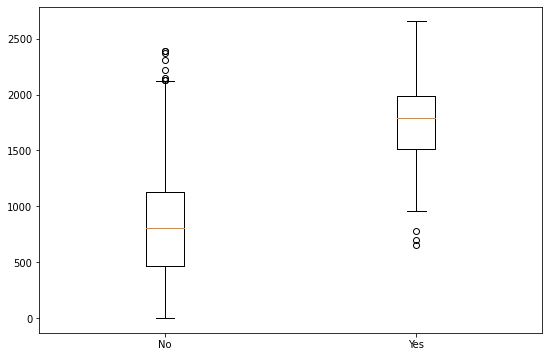

In [4]:
# 연체자와 결제예정금액 
import matplotlib.pyplot as plt
plt.figure(figsize = (9, 6))
plt.boxplot([df[df.default == 'No'].balance,
             df[df.default == 'Yes'].balance],
            labels = ['No', 'Yes'])
plt.show()
# 연체한 사람들의 결제예정금액이 더 높다.(최대, 최소, 중앙값)

# 2. Data Preprocessing
> ## 1) Standardization : 표준화

In [6]:
X = df[['balance']]
y = df['default']
# X = DF
# y = Series

In [7]:
# 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)
X_Scaled[:5]

array([[-0.21883482],
       [-0.03761593],
       [ 0.49241019],
       [-0.6328925 ],
       [-0.10279088]])

> ## 2) Train & Test Split

- 7 : 3

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


# 3. Modeling

> 1) Train_Data로 모델 생성

In [9]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) 
# train 데이터로 학습모델 만들기
# X에는 문자형 데이터 x, y에는 sklearn에서 문자형 데이터 가능

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

> ## 2) Test_Data에 Model 적용

In [10]:
# 학습된 모델에서 예측값 3000개 (y_hat) 뽑아내기(predict 메서드 이용) 
y_hat = model_lr.predict(X_test)
y_hat 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# 4. Model Validation
> ## 1) Accuracy

- Train Accuracy

In [11]:
model_lr.score(X_train, y_train)

0.9724285714285714

- Test Accuracy

In [12]:
model_lr.score(X_test, y_test)

0.9736666666666667

> ## 2) Confusion Matrix

- 'No(상환)' 기준

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)
# (1,1)이 크게 나오는 것은 틀린 것이다.
# (2,2)가 크게 나와야 한다. 
# 'default'의 범주 알파벳 순서대로 들어가기 때문에, (1,1)이 크게 나온다

array([[2889,    7],
       [  72,   32]])

- 'Yes(연체)' 기준

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat, labels = ['Yes', 'No'])
# labels에 Yes를 먼저 적음으로써 (2,2)이 큰, 원하는 모양새가 나온다

array([[  32,   72],
       [   7, 2889]])

> ## 3) Accuracy, Precision, Recall - 'No(상환)'
 - 기준은 어디에 두느냐가 중요함
    - 'No'에 기준을 두는 것보다 'Yes'에 기준을 두는 것이 적합

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No')) # positive를 'No'에 뒀다
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9736666666666667
0.9756838905775076
0.9975828729281768


> ## 4) Accuracy, Precision, Recall = 'Yes(연체)'

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9736666666666667
0.8205128205128205
0.3076923076923077


> ## 5) F1_Score - 'No(상환)'
- 기준은 어디에 두느냐가 중요함
    - 'No'에 기준을 두는 것보다 'Yes'에 기준을 두는 것이 적합

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, pos_label = 'No')

0.9865118661430767

> ## 6) F1_Score - 'Yes(연체)'

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, pos_label = 'Yes')

0.44755244755244755

> ## 7) Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat,
                            target_names = ['No', 'Yes'],
                            digits = 5))
# 1, 2행은 각 클래스가 양성일 때 정밀도, 재현율, f1 점수, 지지도(진짜 샘플의 수)
# Yes일 때를 자세히 보기
# 3,4,5행은 정밀도, 재현율, f1 점수, 지지도의 평균
# macro avg : 클래스별 점수 평균
# weighted avg : 클래스 샘플 수로 가중 평균한 값

              precision    recall  f1-score   support

          No    0.97568   0.99758   0.98651      2896
         Yes    0.82051   0.30769   0.44755       104

    accuracy                        0.97367      3000
   macro avg    0.89810   0.65264   0.71703      3000
weighted avg    0.97030   0.97367   0.96783      3000



###
# The End
###